---

#JWST Early Release Science Program

## PDRs for All (ID 1288)

[pdrs4all.org](https://pdrs4all.org)

---

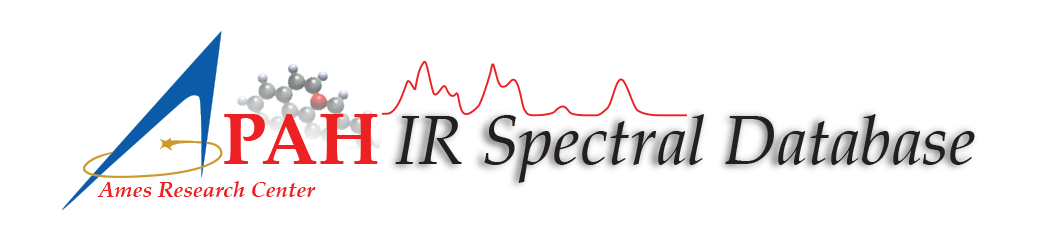 - [PAHdb](https://www.astrochemistry.org/pahdb/)

## The NASA Ames PAH IR Spectroscopic Database

[www.astrochemistry.org/pahdb](https://www.astrochemistry.org/pahdb)

---



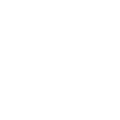

[https://github.com/PAHdb/](https://github.com/PAHdb)

---

# pyPAHdb

pyPAHb is a Python package to fit and decompose _astronomical PAH emission spectra_ into contributing PAH subclasses, i.e., charge and size.

The [PAHFIT](https://github.com/PAHFIT/PAHFIT) tool can be used to isolate the PAH emission component from other components making up an astronomical spectrum.

A paper describing pyPAHdb was presented at [SciPy2018](https://scipy2018.scipy.org/) and can be found using its doi: [https://doi.org/10.25080/Majora-4af1f417-00f](https://doi.org/10.25080/Majora-4af1f417-00f)

pyPAHdb is a convenience *light* version of the PAHdb suite of tools available in [Python](https://github.com/pahdb/amespahdbpythonsuite) and [IDL](https://github.com/pahdb/amespahdbidlsuite). Documentation can be found at [https://pahdb.github.io/pyPAHdb/](pahdb.github.io/pyPAHdb/).

pyPAHdb uses a precomputed matrix of theoretically calculated PAH emission spectra from version 3.00 of the library of computed spectra. This matrix has been constructed from a collection of "astronomical" PAHs, which meet the following criteria and include the fullerenes C<sub>60</sub> and C<sub>70<sub>:

```
'magnesium=0 oxygen=0 iron=0 silicium=0 chx=0 ch2=0 c>20 hydrogen>0'
```

The PAH emission spectra have been calculated employing a PAH emission model using the following parameters:

- A calculated vibrational temperature upon the absorption of a 7 eV photon
- A calculated integrated band intensity after following the entire emission cascade
- A redshift of 15 cm<sup>-1</sup> to mimic some anharmonic effect
- A Gaussian emission profile with a FWHM of 15 cm<sup>-1</sup>


### Methodology

The methodology of pyPAHdb can be summarized in the following flowchart, consisting of three steps: (1) Astronomical spectroscopic data is loaded, whether loaded from FITS or ASCII files. (2) An over-sampled pre-computed matrix of PAH spectra is loaded and interpolated onto the wavelength grid of the astronomical observations. Database-fitting is performed using non-negative least-squares (NNLS), which yields the contribution of an individual PAH molecule to the total fit. As a result, we obtain a breakdown of the model fit in terms of PAH charge and size. (3) The results are written to disk as a single FITS file and as a PDF summarizing the results (one page per pixel, if a spectral cube is provided as input)

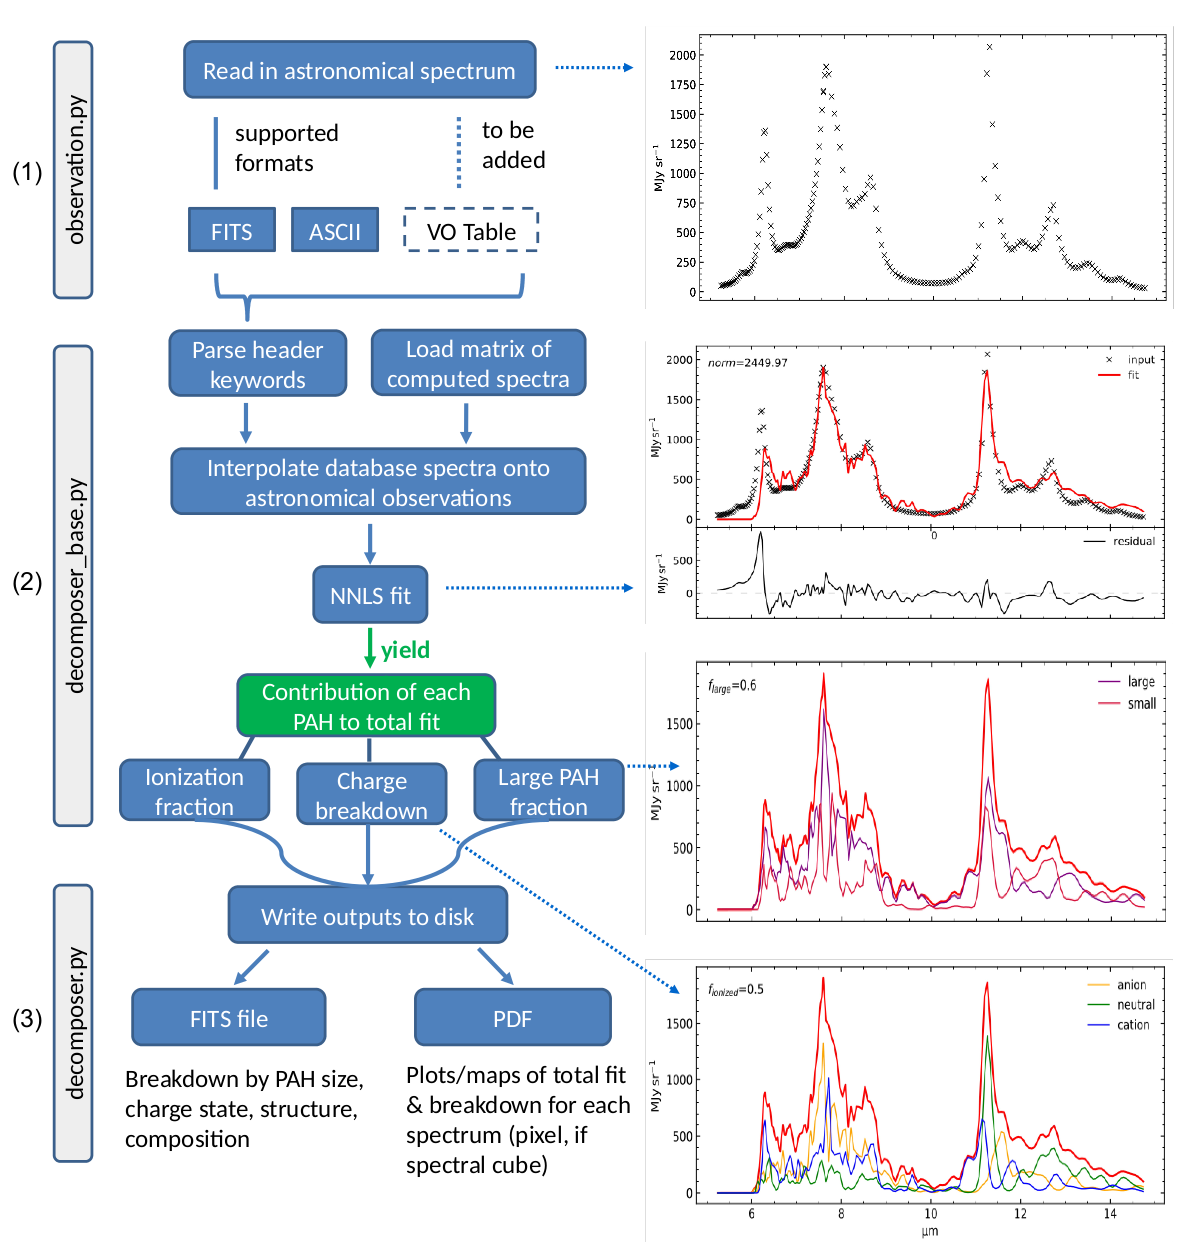

# Demo

### Installation

In [1]:
%pip install git+https://github.com/PAHdb/pyPAHdb.git

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/PAHdb/pyPAHdb.git to /tmp/pip-req-build-eeimk23t
  Running command git clone -q https://github.com/PAHdb/pyPAHdb.git /tmp/pip-req-build-eeimk23t
     |████████████████████████████████| 194 kB 27.1 MB/s 
     |████████████████████████████████| 109 kB 74.9 MB/s 
     |████████████████████████████████| 104 kB 80.3 MB/s 
     |████████████████████████████████| 401 kB 64.2 MB/s 
     |████████████████████████████████| 191 kB 79.2 MB/s 
     |████████████████████████████████| 68 kB 7.2 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 61 kB 8.8 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 60 kB 1.0 MB/s 
  Created wheel f

### Imports

In [ ]:
import pkg_resources
import copy

import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [12, 8]
plt.rcParams['figure.dpi'] = 100

from astropy.wcs import WCS
from astropy.io import fits

from pypahdb.decomposer import Decomposer
from pypahdb.observation import Observation

### Performing a Single Spectrum Fit*

*_redshift corrected_

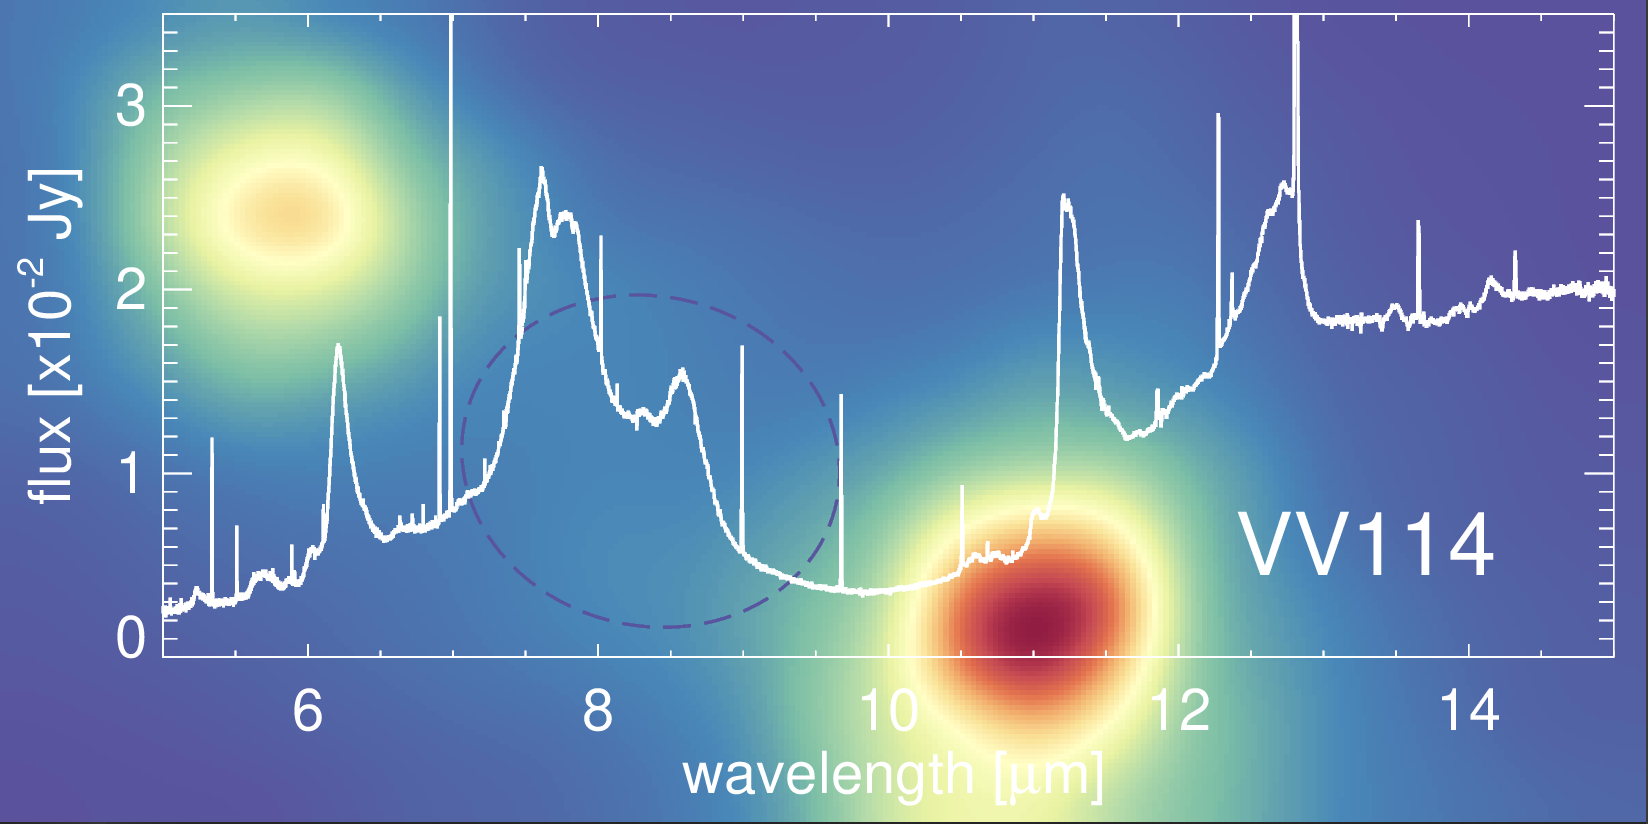

## PAHFIT

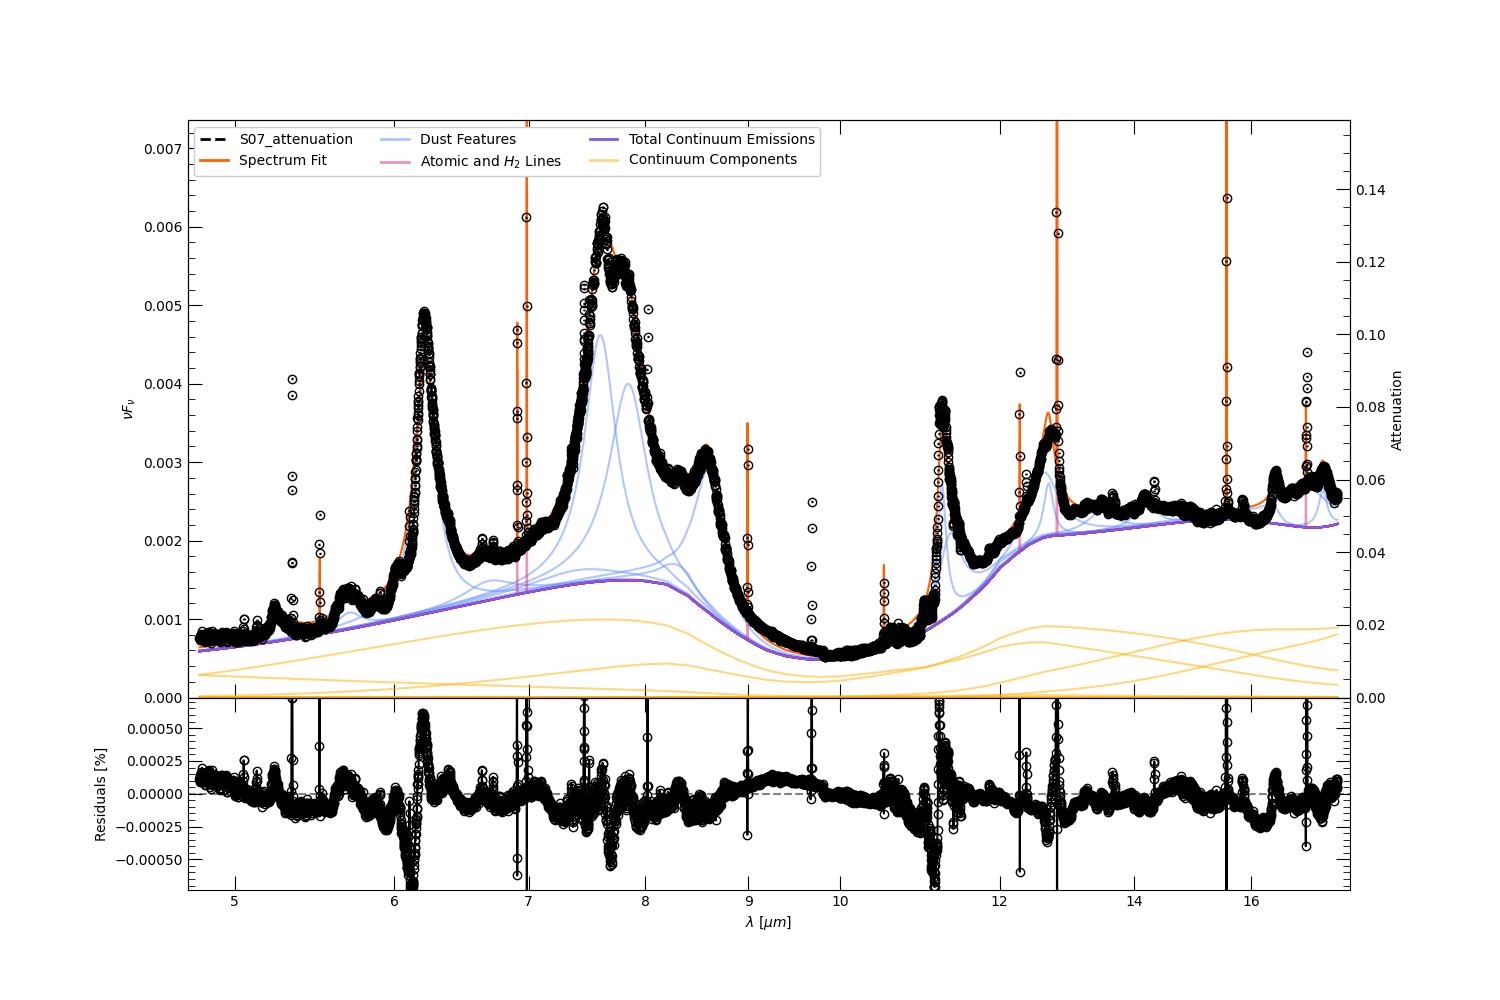

In [ ]:
# Sample JWST data (IPAC table)
file_path = 'resources/sample_data_VV114E.tbl'
data_file = pkg_resources.resource_filename('pypahdb', file_path)

# Construct an Observation object.
obs = Observation(data_file)

# Pass the Observation's spectrum to Decomposer, which performs the fit.
fit = Decomposer(obs.spectrum)

### Display Single Spectrum Fit Results

In [ ]:
fig = fit.plot_fit()

### Performing a Spectral Cube Fit

Reflection Nebula NGC 7023 (Iris Nebula)

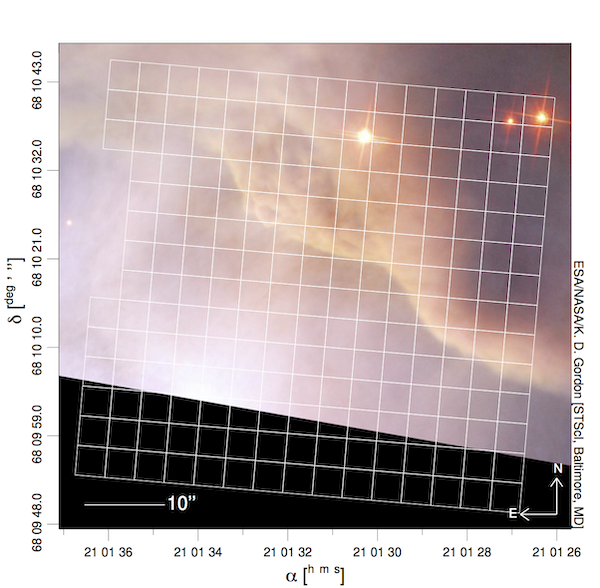

In [ ]:
# Sample Spitzer spectral cube (in FITS format)
file_path = 'resources/sample_data_NGC7023.fits'
data_file = pkg_resources.resource_filename('pypahdb', file_path)

# Construct an Observation object
obs = Observation(data_file)

# Pass the Observation's spectrum to Decomposer, which performs the fit
fit = Decomposer(obs.spectrum)

### Display Spectral Cube Results

A convenience function to fix WCS header information

In [ ]:
# Remove 3rd axis
def fix_header(header):
  hdr = copy.deepcopy(header)
  hdr['NAXIS'] = 2
  cards = ['NAXIS3', 'PC3_3', 'CRPIX3',
           'CRVAL3', 'CTYPE3', 'CDELT3',
           'CUNIT3', 'PS3_0', 'PS3_1',
           'WCSAXES']
  for c in cards:
    if c in hdr:
      del hdr[c]

  return hdr

In [ ]:
fig = fit.plot_map(fit.ionized_fraction,
             "ionized fraction",
              WCS(fix_header(obs.header))
)

### Display Single Pixel Fit Results

In [ ]:
# Pixel position (10,10)
fig = fit.plot_fit(10,10)

### Accessing Results Directly

In [ ]:
print(fit.fit.shape)

print(fit.ionized_fraction.shape)
print(fit.large_fraction.shape)
print(fit.error.shape)

print(fit.size.keys())
print(fit.charge.keys())

### Saving Results to File

In [ ]:
# Save results to PDF
fit.save_pdf('NGC7023_pypahdb.pdf', header=obs.header, doplots=False)

# Save results (ionized fraction, large fraction, and error) to FITS
fit.save_fits('NGC7023_pypahdb_fit.fits', header=obs.header)

#### Inspecting the Output

In [ ]:
with fits.open("NGC7023_pypahdb_fit.fits") as hdulist:
  hdulist.info()

  print()
  for key, value in hdulist["PRIMARY"].header.items():
      print(f"{key} = {value}")
  print()

  plt.figure(figsize=(12,8))
  Decomposer.plot_map(hdulist["PRIMARY"].data[1,:,:],
                      "large fraction",
                      WCS(hdulist["PRIMARY"].header, naxis=(1,2))
                     )

# AmesPAHdbPythonSuite

[GitHub](https://github.com/PAHdb/AmesPAHdbPythonSuite)

[Documentation](https://pahdb.github.io/AmesPAHdbPythonSuite)

## Installation

In [ ]:
%pip install git+https://github.com/PAHdb/AmesPAHdbPythonSuite.git

## Imports

In [ ]:
from amespahdbpythonsuite.amespahdb import AmesPAHdb


### Getting Started

In [ ]:
xml = 'resources/pahdb-theoretical_cutdown.xml'
pahdb = AmesPAHdb(filename=pkg_resources.resource_filename('amespahdbpythonsuite', xml),
                  check=False, cache=False)

uids = [18]

coronene = pahdb.getspeciesbyuid(uids)

### Chemical Structures

In [ ]:
geometry = coronene.geometry()
geometry.plot(uids[0], show=True)

### Transitions

In [ ]:
transitions = coronene.transitions()
transitions.plot(show=True)

### Spectrum

In [ ]:
spectrum = transitions.convolve(fwhm=30.0, lorentzian=True)
spectrum.plot(show=True)

### Emission Modeling

In [ ]:
transitions.cascade(8.0 * 1.6e-12)

cascade = transitions.convolve(fwhm=30.0, drude=True)
cascade.plot(show=True)